# Lab: Naive Bayes Classification

* El modulo sklearn.naive_bayes implementa algoritmos de Naive Bayes que son problemas de aprendizaje supervisados basados en el teorema de Bayes con supuestos fuertes de independencia entre atributos.

> 1. **[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)**: Naive Bayes classifier for multivariate Bernoulli models.

> 2. **[CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB)**. Naive Bayes classifier for categorical features

> 3. **[ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)**: The Complement Naive Bayes classifier described in Rennie et al.

> 4. [**GaussianNB**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB): Gaussian Naive Bayes (GaussianNB)

> 5. **[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)**: Naive Bayes classifier for multinomial models

* Los modelos Naive Bayes son un grupo de algoritmos de clasificación extremadamente rápidos y simples que a menudo son adecuados para conjuntos de datos de muchas dimensiones.
Debido a que son tan rápidos y tienen tan pocos parámetros ajustables, terminan siendo muy útiles para un problema de clasificación.

* Todos los algoritmos clasicos de machine learning asumen que se tiene datos numéricos en un formato de la forma **[n_samples, n_features, N_labels]**.
 

* Para que los documentos sean manejables para las computadoras, primero deben convertirse en alguna estructura numérica. Hay varias técnicas que se usan y una popular esta basada en crear representaciones de espacios vectoriales que son conocidos la bolsa de palabras (BoW). La bolsa de palabras es un enfoque muy intuitivo y consiste:
> 1. Dividir los documentos en tokens siguiendo algún patrón.
> 2. Asignar un peso a cada token proporcional a la frecuencia con la que aparece en el documento y/o en el texto.
> 3. Crear una matriz de términos de documento en la que cada fila represente un documento y cada columna represente un token.

* Los objetos vectorizadores proporcionados por Scikit-Learn son bastante flexibles y tiene tres implementaciones diferentes:
> 1. DictVectorizers: convierte listas de nombres de características en valores del tipo de matrices Numpy o matrices scipy.sparse.
> 2. Count Vectorizer: el más sencillo, cuenta la cantidad de veces que un token aparece en el documento y usa este valor como su peso.
> 3. Hash Vectorizer: Este está diseñado para ser lo más eficiente en memoria posible. En lugar de almacenar los tokens como cadenas, el vectorizador aplica el truco hash para codificarlos como índices numéricos. La desventaja de este método es que una vez vectorizados, los nombres de las características ya no se pueden recuperar.
> 4. Vectorizador TF-IDF: TF-IDF significa term frequency-inverse document frequency, lo que significa que el peso asignado a cada token no solo depende de su frecuencia en un documento, sino también de la recurrencia de ese término en todo el corpus. 

## Categorical Features

Salarios y bonus por profesiones

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = [
    {'Salario': 8000, 'N bonus': 4, 'Profesion': 'Ingeniero'},
    {'Salario': 7000, 'N bonus': 3, 'Profesion': 'Medico'},
    {'Salario': 5000, 'N bonus': 2, 'Profesion': 'Abogado'},
    {'Salario': 3000, 'N bonus': 1, 'Profesion': 'Maestro'},
    {'Salario': 3000, 'N bonus': 1, 'Profesion': 'Maestro'}
]
data

[{'N bonus': 4, 'Profesion': 'Ingeniero', 'Salario': 8000},
 {'N bonus': 3, 'Profesion': 'Medico', 'Salario': 7000},
 {'N bonus': 2, 'Profesion': 'Abogado', 'Salario': 5000},
 {'N bonus': 1, 'Profesion': 'Maestro', 'Salario': 3000},
 {'N bonus': 1, 'Profesion': 'Maestro', 'Salario': 3000}]

In [53]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
d=vec.fit_transform(data)
d

array([[   4,    0,    1,    0,    0, 8000],
       [   3,    0,    0,    0,    1, 7000],
       [   2,    1,    0,    0,    0, 5000],
       [   1,    0,    0,    1,    0, 3000],
       [   1,    0,    0,    1,    0, 3000]])

In [54]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['N bonus',
 'Profesion=Abogado',
 'Profesion=Ingeniero',
 'Profesion=Maestro',
 'Profesion=Medico',
 'Salario']

In [55]:
pd.DataFrame(d, columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,N bonus,Profesion=Abogado,Profesion=Ingeniero,Profesion=Maestro,Profesion=Medico,Salario
0,4,0,1,0,0,8000
1,3,0,0,0,1,7000
2,2,1,0,0,0,5000
3,1,0,0,1,0,3000
4,1,0,0,1,0,3000


In [56]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<5x6 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [57]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['N bonus',
 'Profesion=Abogado',
 'Profesion=Ingeniero',
 'Profesion=Maestro',
 'Profesion=Medico',
 'Salario']

## Texto

* Otra necesidad común es convertir texto en un set de valores numéricos representativos.
Por ejemplo, la mayor parte de la extracción de datos de redes sociales se basa en alguna forma de codificación del texto como números.

* Uno de los métodos más simples para codificar datos es mediante *recuentos de palabras*: Se toma cada fragmento de texto, se cuenta las ocurrencias de cada palabra y se coloca los resultados en una tabla.

* Por ejemplo, considere el siguiente conjunto de frases:

In [58]:
sample = ['Me gusta el ceviche',
          'Lima es una ciudad muy contaminada',
          'Las computadoras son muy eficientes en estos dias',
          'Machine learning es muy interesante']

* Para la vectorizacion de estos datos basada en el recuento de palabras, se construye una columna que represente la palabra "ceviche", la palabra "Lima", la palabra "computadora", etc.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X.toarray())

[[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0]]


In [60]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ceviche,ciudad,computadoras,contaminada,dias,eficientes,el,en,es,estos,gusta,interesante,las,learning,lima,machine,me,muy,son,una
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0


* Sin embargo, existen algunos problemas con este enfoque donde los recuentos de palabras sin procesar dan lugar a características que ponen demasiado peso en las palabras que aparecen con mucha frecuencia y esto puede ser contraproducente en algunos problemas de clasificación.
Un enfoque para solucionar este problema se conoce como *term frequency-inverse document frequency* (*TF-IDF*) que pondera el recuento de palabras por una medida de la frecuencia con la que aparecen en los documentos.
La sintaxis para calcular es similar al ejemplo anterior:

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ceviche,ciudad,computadoras,contaminada,dias,eficientes,el,en,es,estos,gusta,interesante,las,learning,lima,machine,me,muy,son,una
0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.0,0.445922,0.000000,0.445922,0.000000,0.000000,0.0,0.000000,0.351570,0.000000,0.0,0.000000,0.000000,0.000000,0.445922,0.000000,0.0,0.284626,0.000000,0.445922
2,0.0,0.000000,0.367423,0.000000,0.367423,0.367423,0.0,0.367423,0.000000,0.367423,0.0,0.000000,0.367423,0.000000,0.000000,0.000000,0.0,0.234522,0.367423,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.392784,0.000000,0.0,0.498197,0.000000,0.498197,0.000000,0.498197,0.0,0.317993,0.000000,0.000000


## Clasificación bayesiana (Modelos generativos)

* Los clasificadores Naive Bayes se basan en el teorema de Bayes que describe la relación de probabilidades condicionales.
En la clasificación bayesiana se desea encontrar la probabilidad de una etiqueta dadas algunos atributos observados, que podemos escribir como $P(C_k~|~{\rm atributos})$.

* Segun el teorema de Bayes:

$$P(C_k~|~{\rm atributos}) = \frac{P({\rm atributos}~|~C_k)P(C_k)}{P({\rm atributos})}$$

* Si estamos tratando de decidir entre dos etiquetas, llamémoslas $C_0$ y $C_1$, entonces una forma de tomar esta decisión es calcular la razón de las probabilidades posteriores para cada etiqueta:

$$\frac{P(C_0~|~{\rm atributos})}{P(C_1~|~{\rm atributos})} = \frac{P({\rm atributos}~|~C_0)}{P({\rm atributos}~|~C_1)}\frac{P(C_0)}{P(C_1)}
$$

* Todo lo que se necesita es algún modelo mediante el cual podamos calcular  $P({\rm atributos}~|~C_k)$ para cada etiqueta.

* Especificar el modelo generativo para cada etiqueta es la parte principal del entrenamiento del clasificador bayesiano.
La versión general de dicho paso de entrenamiento es una tarea muy difícil, pero se simplifica mediante el uso de algunas suposiciones sobre la forma del modelo y el dataset. Los diferentes tipos de clasificadores Naive Bayes se basan en diferentes suposiciones.

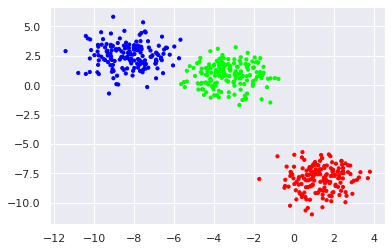

In [62]:
from sklearn.datasets import make_blobs
X, y = make_blobs(500, 2, centers=3, center_box=(-10,10),cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10,cmap='brg')

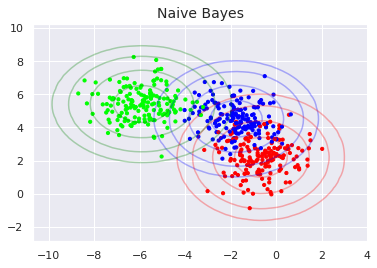

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='brg')
plt.title('Naive Bayes', size=14)

xg = np.linspace(X[:, 0].min()-2, X[:, 0].max()+2, 60)
yg = np.linspace(X[:, 1].min()-2, X[:, 1].max()+2, 60)

xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red','green']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    plt.contour(xx, yy, P.reshape(xx.shape), levels=[0.001, 0.01, 0.1, 0.5, 1, 10,100],
               colors=color, alpha=0.3)
    

Las elipses representan el modelo generativo gaussiano para cada etiqueta, con mayor probabilidad hacia el centro de las elipses.
Con este modelo generativo implementado para cada clase, tenemos una forma simple para calcular la probabilidad $P({\rm atributos}~|~C_k)$ para cualquier punto de datos calculando el posterior y determinar qué etiqueta es la más probable.

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors=[0.1,0.2,0.7])
model.fit(X, y)

GaussianNB(priors=[0.1, 0.2, 0.7])

In [15]:
Xnew = [-15, 10]* np.random.uniform(-1,1,(4000, 2))
ynew = model.predict(Xnew)

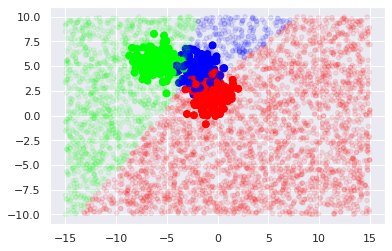

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='brg', alpha=0.1)

In [17]:
yprob = model.predict_proba(Xnew)
yprob[20:].round(2)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.02, 0.  , 0.98],
       ...,
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ]])

##Email spam (Naive bayes)

* La distribución multinomial es una generalización de la distribución binomial y modela n ensayos independientes donde cada uno conduce a un éxito para cada una de las k categorías, y cada categoría tiene una probabilidad de éxito fija. La distribución multinomial da la probabilidad de cualquier combinación particular de números de éxitos para las diversas categorías. Por ejemplo modela la probabilidad de conteos para cada cara de un dado de 6 caras lanzado n veces.

* Una de las aplicaciones más populares del aprendizaje automático es el análisis de datos categóricos, específicamente datos de texto. 

* A pesar de los supuestos aparentemente simplificados en exceso, los clasificadores Naive bayes han funcionado bastante bien en muchas situaciones reales, como la clasificación de documentos y el filtrado de spam. Requieren una pequeña cantidad de datos de entrenamiento para estimar los parámetros necesarios.

* Estos clasificadores pueden ser extremadamente rápidos en comparación con métodos más sofisticados. El desacoplamiento de las distribuciones de características condicionales de clase significa que cada distribución se puede estimar de forma independiente como una distribución unidimensional. Esto, a su vez, ayuda a aliviar los problemas derivados de la maldición de la dimensionalidad.

In [18]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/PCL-AI/MT616_2019_1/master/Lab08/email_spam.csv'

df = pd.read_csv(url)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [20]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer()
#vec = CountVectorizer()
X_train_count = vec.fit_transform(X_train.values)
X_train_count.toarray().shape

(4457, 7869)

* La distribución multinomial es una generalización de la distribución binomial y modela n ensayos independientes donde cada uno conduce a un éxito para cada una de las k categorías, y cada categoría tiene una probabilidad de éxito fija. La distribución multinomial da la probabilidad de cualquier combinación particular de números de éxitos para las diversas categorías. Por ejemplo modela la probabilidad de conteos para cada cara de un dado de 6 caras lanzado n veces.

In [23]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=0.001)
MNB.fit(X_train_count,y_train)
MNB.score(X_train_count, y_train)

0.9993269015032533

In [24]:
X_test_count = vec.transform(X_test)
MNB.score(X_test_count, y_test)

0.9874439461883409

In [25]:
emails = [
    'Hey lets play soccer in the beach',
    'Up to 20% discount exclusive. Dont miss this reward'
]
emails_count = vec.transform(emails)
MNB.predict(emails_count)

array([0, 1])

In [26]:
# Pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', MultinomialNB(alpha=0.001))
])

In [27]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('nb', MultinomialNB(alpha=0.001))])

In [28]:
clf.score(X_test,y_test)

0.9874439461883409

In [29]:
clf.predict(emails)

array([0, 1])

### Ejemplo: clasificación de texto

Un lugar donde a menudo se usa  multinomial naive Bayes es en la clasificación de texto, donde las características están relacionadas con el recuento de palabras o las frecuencias dentro de los documentos a clasificar.
20 grupos de noticias para mostrar cómo podríamos clasificar estos documentos breves en categorías.



In [41]:
from sklearn.datasets import fetch_20newsgroups

df = fetch_20newsgroups()
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [42]:
categories = ['rec.autos', 'sci.electronics',
              'talk.politics.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.os.ms-windows.misc','rec.sport.baseball']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [43]:
print(train.data[5])

From: roger@crux.Princeton.EDU (Roger Lustig)
Subject: Re: Jewish Baseball Players?
Originator: news@nimaster
Nntp-Posting-Host: crux.princeton.edu
Reply-To: roger@astro.princeton.edu (Roger Lustig)
Organization: Princeton University
Lines: 39

In article <1993Apr15.221049.14347@midway.uchicago.edu> thf2@midway.uchicago.edu writes:
>In article <1qkkodINN5f5@jhunix.hcf.jhu.edu> pablo@jhunix.hcf.jhu.edu (Pablo A Iglesias) writes:
>>In article <15APR93.14691229.0062@lafibm.lafayette.edu> VB30@lafibm.lafayette.edu (VB30) writes:
>>>Just wondering.  A friend and I were talking the other day, and
>>>we were (for some reason) trying to come up with names of Jewish
>>>baseball players, past and present.  We weren't able to come up
>>>with much, except for Sandy Koufax, (somebody) Stankowitz, and
>>>maybe John Lowenstein.  Can anyone come up with any more.  I know
>>>it sounds pretty lame to be racking our brains over this, but
>>>humor us.  Thanks for your help.

>>Hank Greenberg would have to

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

vec = TfidfVectorizer()
#vec = CountVectorizer()
X_train_text = vec.fit_transform(train.data)
X_test_text = vec.transform(test.data)
X_train_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X_train_text.shape

(3428, 70725)

In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_text,train.target)
clases_train = mnb.predict(X_train_text)
mnb.score(X_train_text,train.target)

0.9953325554259043

In [47]:
clases_test = mnb.predict(X_test_text)
mnb.score(X_test_text,test.target)


0.8777388255915863

Text(30.499999999999993, 0.5, 'Clase predicida')

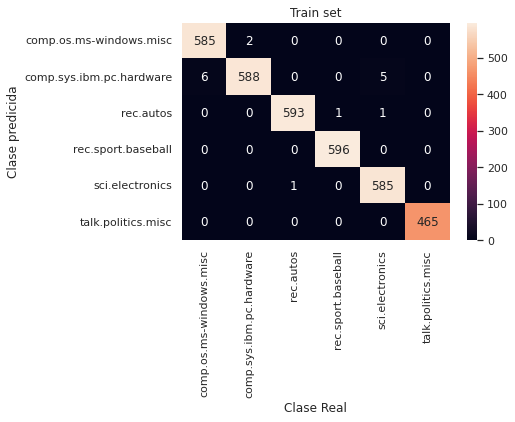

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train.target, clases_train)
sns.heatmap(mat.T, annot=True, fmt='d',
            xticklabels=train.target_names, 
            yticklabels=train.target_names)

plt.title('Train set')
plt.xlabel('Clase Real')
plt.ylabel('Clase predicida')

Text(30.499999999999993, 0.5, 'Clase predicida')

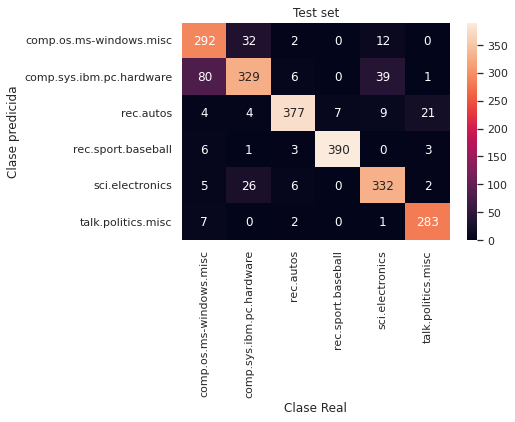

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, clases_test)
sns.heatmap(mat.T, annot=True, fmt='d',
            xticklabels=test.target_names, 
            yticklabels=test.target_names)

plt.title('Test set')
plt.xlabel('Clase Real')
plt.ylabel('Clase predicida')

In [50]:
from sklearn.pipeline import make_pipeline

mnb_p = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=0.1))

mnb_p.fit(train.data, train.target)

clases = mnb_p.predict(test.data)

In [51]:
pred = mnb_p.predict(['Tesla is faster than honda'])
test.target_names[pred[0]]

'rec.autos'